In [35]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

## Naive Bayes (NB)

Recall Bayes' Theorem from stats, based on the idea of conditional probability. Bayes' Theorem tells us that:

It states, for two events A & B, if we know the conditional probability of B given A and the probability of B, then it’s possible to calculate the probability of B given A.

$ P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots, x_n \mid y)} 
                                 {P(x_1, \dots, x_n)} $

In stats we also looked at Bayesian Interference - where we built tables to update our probabilites as more data was learned. The Naive Bayes algorithm is just that, but on a larger scale. Each feature updates the probabilities just like in a simple Bayes' table calculation we did by hand. We can show an example:


![Bayes 1](images/bayes1.png "Bayes 1" )

Here is the table of all the features and outcomes, the training data. If we use this to create a model, and make a prediction, one sample looks like:


![Bayes 2](images/bayes2.png "Bayes 2" )

Easy, peasy!

Bayes' is an algorithm which works well, accurately and quickly, but only in certain scenarios. The simplicity of the Bayes' Theorm based calcualtions have a few key notes:
<ul>
<li> NB assumes all features are independent. If they are not, accuracy will suffer. In real data, that independance often doesn't exist. 
<li> NB is generally quite fast. 
<li> NB often is able to become relatively accurate from small training sets. 
<li> NB runs into an issue with a value in the test data was not in the training data. Implementations work around this using Laplace smoothing - which just adds a constant (normal alpha) on the top and bottom of the probability equation.
![Bayes 2](images/laplace.jpg "Bayes 2" )
<li> NB probability estimates are not to be relied on, even if the classification is accurate. 
</ul>

Now, Bayes is based on yes/no probabilites for a target outcome, and categorical features as the only inputs. Implementations of NB differ to handle these scenarios, sklearn has several. Two important ones are:
<ul>
<li> Gaussian Naive Bayes - assumes numerical features are distributed along a normal distribution. This is very common as regular Bayes can't handle numerical features. 
<li> Multinomial Naive Bayes - generates predictions into 3+ outcome classes. 
</ul>

Bayes is commonly used for things like spam detection, where high speed yes/no classification is required. 

### Laplace Smoothing

One critical issue with Bayes is a scenario where we get a feature value to predict that wan't in the training set. For example, what if we had a value for Windy that was "gale force" in something that we tried to predict. There would be no existing probability info for that, since it wasn't in the training data. This is known as the Zero Probability Problem. 

This is mitigated by something called Laplace Smoothing, which inserts a constant alpha (often/usually 1), on both the top and bottom of the probability calculations. This ensures that we don't encounter a scenario where we are dividing by 0, without substantially changing the probability calculations. Alpha is a hyperparameter that we can select, doing things like a grid search to find the best solution for our data. 

![Laplace](images/laplace.png "Laplace" )

## Bayes from Scratch

We can build a really simple implementation of Bayes. Our dataset is a bunch of simple categorical variables, the number of records is small, and our target is a boolean (yes/no). Great candidate. 

In [36]:
df = pd.read_csv("data/golf-dataset.csv")
df.head()

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [37]:
class  MyNaiveBayes:

	"""
		Bayes Theorem:
										Likelihood * Class prior probability
				Posterior Probability = -------------------------------------
											Predictor prior probability
				
							  			 P(x|c) * p(c)
							   P(c|x) = ------------------ 
											  P(x)
	"""

	def __init__(self):

		"""
			Attributes:
				likelihoods: Likelihood of each feature per class
				class_priors: Prior probabilities of classes 
				pred_priors: Prior probabilities of features 
				features: All features of dataset
		"""
		self.features = list
		self.likelihoods = {}
		self.class_priors = {}
		self.pred_priors = {}

		self.X_train = np.array
		self.y_train = np.array
		self.train_size = int
		self.num_feats = int

	def fit(self, X, y):

		self.features = list(X.columns)
		self.X_train = X
		self.y_train = y
		self.train_size = X.shape[0]
		self.num_feats = X.shape[1]

		for feature in self.features:
			self.likelihoods[feature] = {}
			self.pred_priors[feature] = {}

			for feat_val in np.unique(self.X_train[feature]):
				self.pred_priors[feature].update({feat_val: 0})

				for outcome in np.unique(self.y_train):
					self.likelihoods[feature].update({feat_val+"_"+outcome:0})
					self.class_priors.update({outcome: 0})

		self._calc_class_prior()
		self._calc_likelihoods()
		self._calc_predictor_prior()

	def _calc_class_prior(self):

		""" P(c) - Prior Class Probability """

		for outcome in np.unique(self.y_train):
			# Complete - Calculate class priors
			# Store in self.class_priors dictionary


	def _calc_likelihoods(self):

		""" P(x|c) - Likelihood """

		for feature in self.features:

			for outcome in np.unique(self.y_train):
				# Complete - Calculate likelihoods
				# Store in self.likelihoods dictionary
				# Note: the likelihoods are stored for both yes and no in the format: feat_val + '_' + outcome
				# See sample output for example


	def _calc_predictor_prior(self):

		""" P(x) - Evidence """

		for feature in self.features:
			# Caclulate priors for the predictors
			# Store in self.pred_priors
			# Probability of each outcome for each feature


	def predict(self, X):

		""" Calculates Posterior probability P(c|x) """

		results = []
		X = np.array(X)

		for query in X:
			probs_outcome = {}
			for outcome in np.unique(self.y_train):
				prior = self.class_priors[outcome]
				likelihood = 1
				evidence = 1

				for feat, feat_val in zip(self.features, query):
					likelihood *= self.likelihoods[feat][feat_val + '_' + outcome]
					evidence *= self.pred_priors[feat][feat_val]

				posterior = (likelihood * prior) / (evidence)
				probs_outcome[outcome] = posterior

			result = max(probs_outcome, key = lambda x: probs_outcome[x])
			results.append(result)

		return np.array(results)

In [38]:
y = df["Play Golf"]
X = df.drop(columns={"Play Golf"})
X["Windy"] = X["Windy"].astype("str")

nb_clf = MyNaiveBayes()
nb_clf.fit(X, y)

print(accuracy_score(y, nb_clf.predict(X)))

0.9285714285714286


In [39]:
# With Proper Data Prep - though the dataset is small, so this won't be the best example. 
#X_train, X_test, y_train, y_test = train_test_split(X, y)
#nb_clf.fit(X_train, y_train)
#nb_preds = nb_clf.predict(X_test)
#print(accuracy_score(y_test, nb_preds))

#### Predict if we Should Golf on Some Random Days

Create a dataframe with some days of weather and predict them. Note that the model (probably, unless you made it better) expects True/False to be strings, not booleans. Your dataframe should be in the same format as the feature set - X

In [40]:
# Complete - add in a dataframe of days. 
# Predict if we should golf on those days. 

['No' 'Yes']


,Outlook,Temp,Humidity,Windy
0,Rainy,Hot,High,False
1,Sunny,Mild,High,False


## Sklearn

Our Bayes works, but we can use sklearn for something that we are used to using, and is a bit more polished and better written. Multinomial NB is the default, it will work for both binary predictions, like we are doing, and multiple class predictions. 

Applying Bayes in code is similar to all the other algorithms. Here we'll encode the categories to make it work since the algorithm doesn't deal with strings, sklearn's implementation requires this, but it isn't inheirent to the algorithm. 


In [45]:
y = df["Play Golf"]
X = df.drop(columns={"Play Golf"})

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

mnb = MultinomialNB()
mnb_pipe = Pipeline([
    ("encode", OneHotEncoder()),
    ("model", mnb)
])
mnb_pipe.fit(X, y)
sk_preds = mnb_pipe.predict(X)
accuracy_score(sk_preds, y)

0.9285714285714286

In [47]:
# Complete - predict our sample days using the sklearn model

array(['No', 'Yes'], dtype='<U3')

## Gaussian Bayes

As we noted, regular Naive Bayes doesn't deal with numbers, so we can used Gaussian Bayes to handle those scenarios. Every step of the algorithm just requires a probability that something will occur or not occur. With categorical variables that calculation is very simple - count the number of times that it happens and divide by the total. With numerical values there isn't a direct equivalent. 

Rather than looking at the probability that something happens or doesn't happen, Gaussian NB calculates the probability of being in class A or B according to a normal distribution of the numerical feature. Outside of the different calculations of probability, the rest of the algorithm works in the same way as before. 


![GNB](images/gauss_dist.png "GNB" )

In [48]:
from sklearn.naive_bayes import GaussianNB
df_gaus = pd.read_csv("data/diabetes.csv")
df_gaus_y = df_gaus["Outcome"]
df_gaus_X = df_gaus.drop(columns={"Outcome"})
df_gaus.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Distributions

We can make a plot as a shortcut to see the distributions of the numerical variables split by outcome class. If we look at the comparative distributions we can get a sense of the relative probabilities that are used in the calculations. 

For example, if we look at the Glucose feature. If we have an example with a glucose value of 100, the probability of that example being in class 0 is quite high, whereas the probability of it being in class 1 is low. If we have a sample that is 200, the probability of that being in class 1 is much higher. 

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

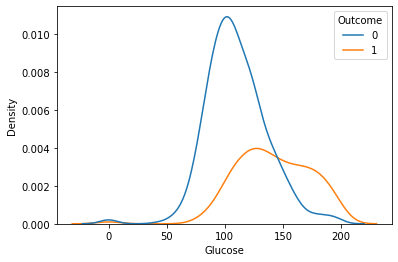

In [49]:
sns.kdeplot(data=df_gaus, x="Glucose", hue="Outcome")

In [51]:
# Split data - this one has enough data to function properly
X_train_gaus, X_test_gaus, y_train_gaus, y_test_gaus = train_test_split(df_gaus_X, df_gaus_y)

# Model and predict
gaus_NB = GaussianNB()
gaus_NB.fit(X_train_gaus, y_train_gaus)
gaus_preds = gaus_NB.predict(X_test_gaus)
accuracy_score(y_test_gaus, gaus_preds)

0.7239583333333334

#### Scaling

Note that because in Bayes the features are independent of each other, there is no interaction between them with respect to calculations. When the probabilities are calculated for each feature, they dont depend on any other features - contrasted with something like linear regresion, where m1*x1 + m2*x2... will. 

Because of this, Bayes is one of the few things where scaling doesn't matter, though it also doesn't hurt if it is in there. 

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [53]:
pipe_gaus = Pipeline([
    ("scale", StandardScaler()),
    ("model", GaussianNB())
])
pipe_gaus.fit(X_train_gaus, y_train_gaus)
pipe_gaus_preds = pipe_gaus.predict(X_test_gaus)
accuracy_score(y_test_gaus, pipe_gaus_preds)

0.7239583333333334

#### Exercise

Predict if people have heart disease with Gaussian NB. Note that we have mixed column types for features. 

In [54]:
heart = pd.read_csv("data/heart.csv")
y_h = heart["HeartDisease"]
X_h = heart.drop(columns={"HeartDisease"})
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [55]:
# Complete - predict heart disease

0.8695652173913043